<a href="https://colab.research.google.com/github/natoo77/GymMemebersDataset---EDA-Calorie-prediction/blob/main/Gym_Members_Exercise_Dataset_EDA_%2B_Calorie_prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest data version from kaggle
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.6k/21.6k [00:00<00:00, 26.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [3]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv')

In [4]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


**Columns description:**
- `Age`  The age of the individual (in years)
- `Gender` The individual's gender (Male, Female)
- `Weight(kg)` The body weight of the individual in kilograms
- `Height(m)`	The height of the individual in meters
- `Max_BPM`	The maximum heart rate (beats per minute) recorded during the workout
- `Avg_BPM`	The average heart rate (beats per minute) during the workout session
- `Resting_BPM`	The individual’s resting heart rate (beats per minute) prior to the workout.
- `Session_Duration(hours)`	The duration of the workout session, measured in hours.
- `Calories_Burned`	The total calories burned during the workout session
- `Workout_Type`	The type of workout performed (e.g., Cardio, Strength, Yoga)
- `Fat_Percentage`	The individual’s body fat percentage.
- `Water_Intake(liters)` The amount of water consumed during or around the workout, in liters.
- `Workout_Frequency (days/week)`	How often the individual works out, measured in days per week.
- `Experience_Level`	The individual’s fitness level or experience (e.g., Beginner, Intermediate, Advanced).
- `BMI` Body Mass Index, calculated as weight (kg) divided by the square of height (m).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Gender,973,2,Male,511
Workout_Type,973,4,Strength,258


In [8]:
data.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


# **EDA** - Exploratory Data Analysis

### Analysis of single features

<Axes: xlabel='Age', ylabel='Count'>

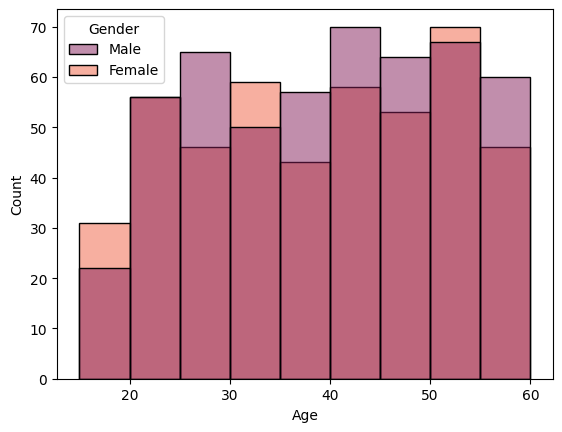

In [9]:
# @title Age histogram

sns.histplot(data=data, x="Age", hue= 'Gender', binwidth=5, binrange=[15,60], palette= 'rocket')


Text(0, 0.5, 'Count')

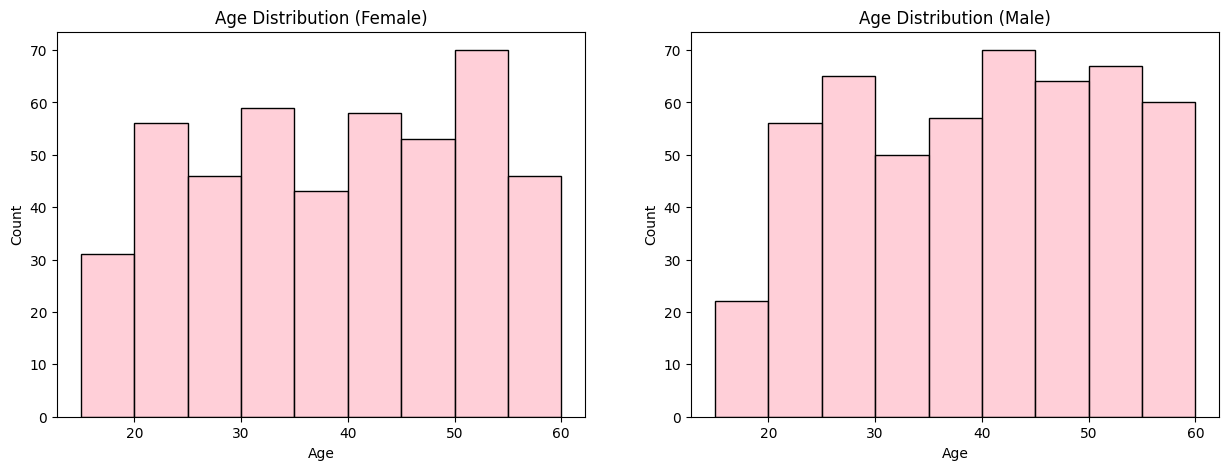

In [10]:
# @title Age histogram by gender
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=data[data['Gender'] == 'Female'], x="Age", binwidth=5, binrange=[15,60], color='pink')
plt.title("Age Distribution (Female)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.histplot(data=data[data['Gender'] == 'Male'], x="Age", binwidth=5, binrange=[15,60], color='pink')
plt.title("Age Distribution (Male)")
plt.xlabel("Age")
plt.ylabel("Count")


<Axes: xlabel='Gender', ylabel='count'>

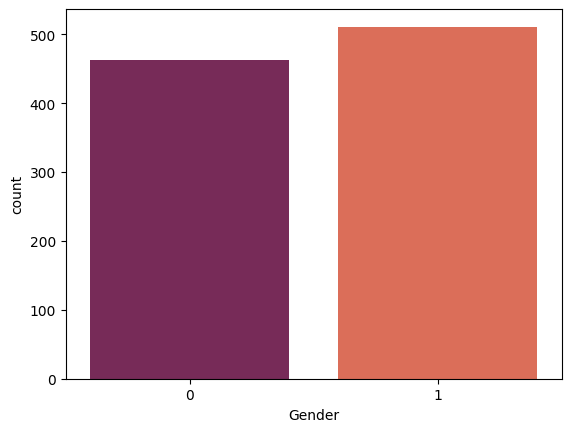

In [46]:
# @title Gender count
sns.countplot(data=data, x='Gender', palette= 'rocket', hue_order=['Female','Male'])


<Axes: xlabel='Workout_Frequency (days/week)', ylabel='count'>

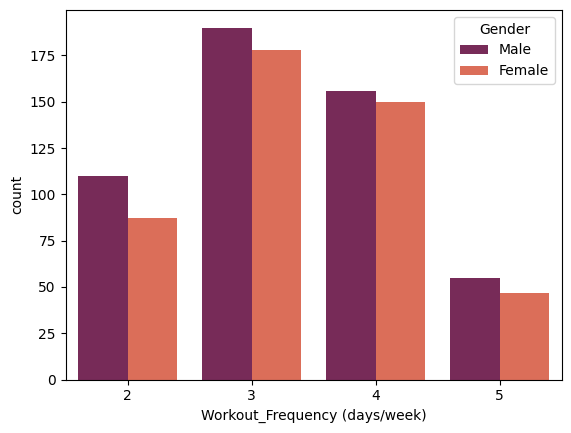

In [12]:
# @title Workout frequency

sns.countplot(x='Workout_Frequency (days/week)', hue='Gender', data=data, palette= 'rocket')

<Axes: xlabel='Workout_Type', ylabel='count'>

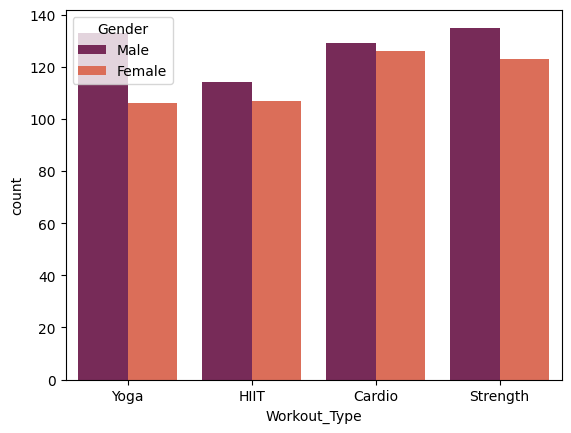

In [13]:
# @title Workout types

sns.countplot(x='Workout_Type', data=data, hue='Gender', palette= 'rocket')

<Axes: xlabel='Experience_Level', ylabel='count'>

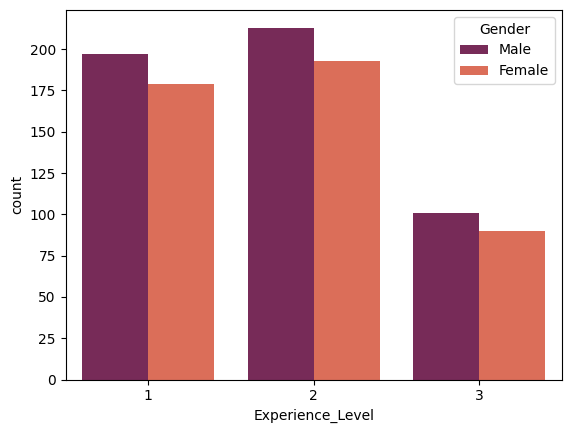

In [14]:
# @title Experience level

sns.countplot(x='Experience_Level', data=data, hue='Gender', palette= 'rocket')

<Axes: xlabel='Session_Duration (hours)', ylabel='Count'>

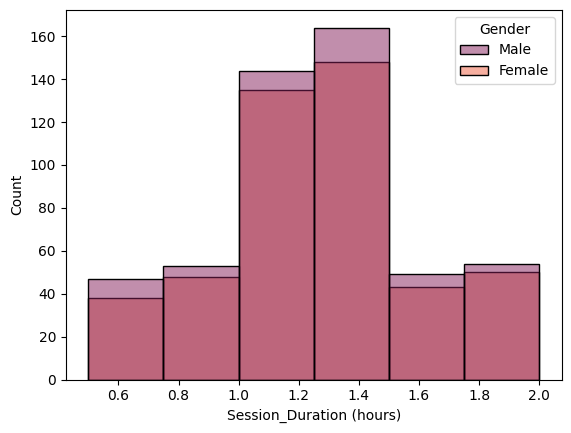

In [15]:
# @title Session duration
sns.histplot(data=data, x="Session_Duration (hours)", binwidth=0.25, binrange=[0.5,2], hue= 'Gender', palette= 'rocket')
#30, 45, 60, 75, 90, 105,120 - inervals for workout

<Axes: xlabel='Calories_Burned', ylabel='Count'>

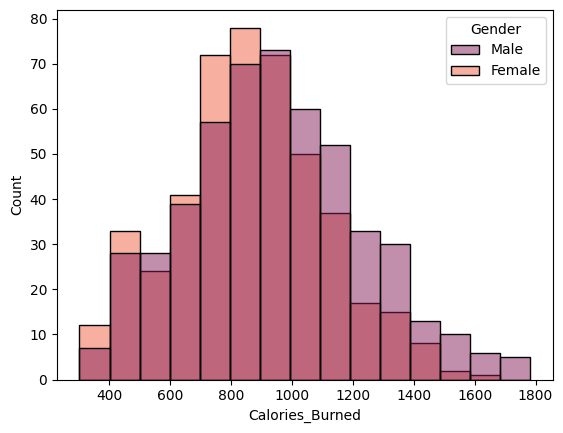

In [16]:
# @title Calories burnt
sns.histplot(data=data, x="Calories_Burned", hue= 'Gender', bins=15, palette= 'rocket')
#30, 45, 60, 75, 90, 105,120 - inervals for workout

In [17]:

# d11 = data.groupby('Workout_Type')['Max_BPM'].max()
# d12 = data.groupby('Workout_Type')['Max_BPM'].min()
# d13 = data.groupby('Workout_Type')['Max_BPM'].median()

# d1 = pd.concat([d11, d12, d13], keys=['MAX(Max_BPM)', 'MIN(Max_BPM)', 'MEDIAN(Max_BPM)'], axis=1)


# d21 = data.groupby('Workout_Type')['Avg_BPM'].max()
# d22 = data.groupby('Workout_Type')['Avg_BPM'].min()
# d23 = data.groupby('Workout_Type')['Avg_BPM'].median()

# d2 = pd.concat([d21, d22, d23], keys=['MAX(Avg_BPM)', 'MIN(Avg_BPP)', 'MEDIAN(Avg_BPM)'], axis=1)

# d31 = data.groupby('Workout_Type')['Resting_BPM'].max()
# d32 = data.groupby('Workout_Type')['Resting_BPM'].min()
# d33 = data.groupby('Workout_Type')['Resting_BPM'].median()

# d3 = pd.concat([d31, d32, d33], keys=['MAX(Resting_BPM)', 'MIN(Resting_BPM)', 'MEDIAN(Resting_BPM)'], axis=1)

# data_workouttypes_vs_bpm = pd.concat([d1, d2, d3], axis=1)
# data_workouttypes_vs_bpm

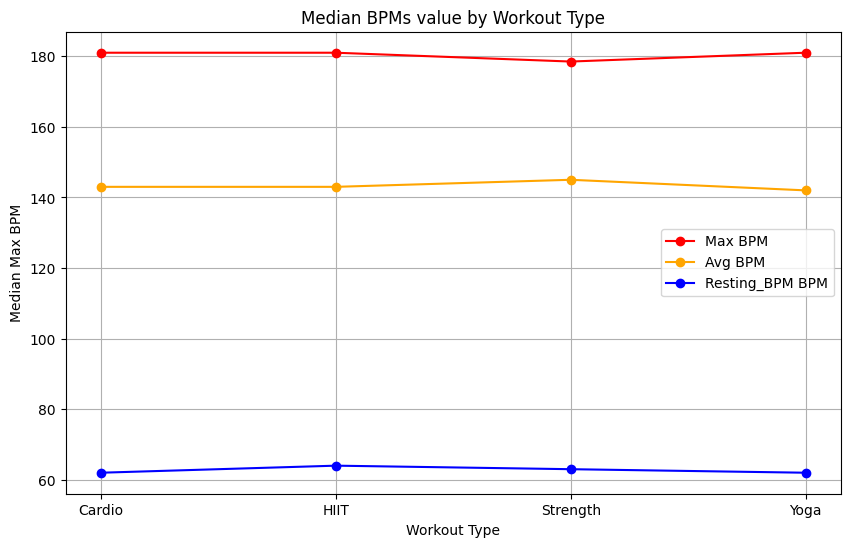

In [18]:
# Group by Workout_Type and calculate the median Max_BPM
grouped_data1 = data.groupby('Workout_Type')['Max_BPM'].median().reset_index()
grouped_data2 = data.groupby('Workout_Type')['Avg_BPM'].median().reset_index()
grouped_data3 = data.groupby('Workout_Type')['Resting_BPM'].median().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(grouped_data1['Workout_Type'], grouped_data1['Max_BPM'], label='Max BPM', color='red', marker='o')
plt.plot(grouped_data2['Workout_Type'], grouped_data2['Avg_BPM'], label='Avg BPM', color='orange', marker='o')
plt.plot(grouped_data3['Workout_Type'], grouped_data3['Resting_BPM'], label='Resting_BPM BPM', color='blue', marker='o')
plt.title("Median BPMs value by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Median Max BPM")
plt.grid()
plt.legend()
plt.show()

### Analysis of combined features

<ipython-input-19-60ead7871fd1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Workout_Frequency (days/week)", y="Session_Duration (hours)", data=data, palette= 'rocket')


<Axes: xlabel='Workout_Frequency (days/week)', ylabel='Session_Duration (hours)'>

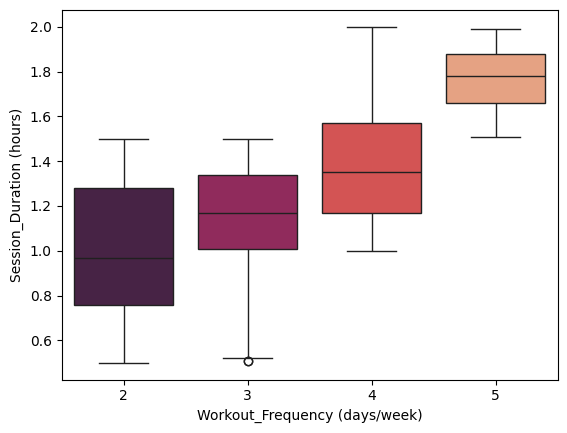

In [19]:
# @title Workout Frequency Vs. Session Duration

sns.boxplot(x="Workout_Frequency (days/week)", y="Session_Duration (hours)", data=data, palette= 'rocket')

<ipython-input-20-8f3311bb2135>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Workout_Frequency (days/week)", y="Calories_Burned", data=data, palette= 'rocket')


<Axes: xlabel='Workout_Frequency (days/week)', ylabel='Calories_Burned'>

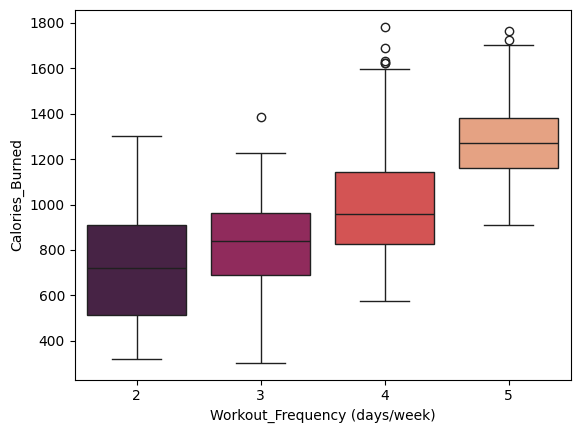

In [20]:
# @title Workout Frequency Vs. Calories Burnt

sns.boxplot(x="Workout_Frequency (days/week)", y="Calories_Burned", data=data, palette= 'rocket')

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

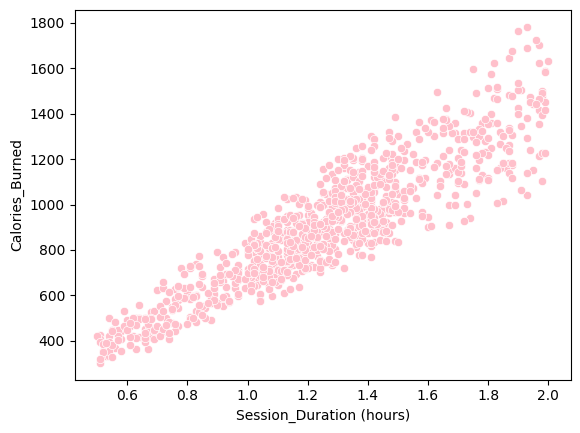

In [21]:
# @title Session_Duration (hours) Vs. Calories Burnt
sns.scatterplot(x='Session_Duration (hours)',y='Calories_Burned',data=data, color= 'pink')

Max_BPM
Avg_BPM
Resting_BPM
Session_Duration (hours)
Calories_Burned

# MODEL BUILDING


This project addresses a **Regression Machine Learning** problem, aiming to build a predictive model for estimating calorie burn. The model leverages input features such as the type, duration, and intensity of physical activity, along with individual characteristics like age, weight, and gender. The objective is to accurately predict the calories burned during specific activities. This model offers valuable insights for individuals, fitness enthusiasts, and healthcare professionals, helping them optimize calorie management and plan physical activities more effectively.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

We have 2 categorical features : ['Gender', 'Workout_Type']


Although expericne level is 1-3 is categorical also

<Axes: >

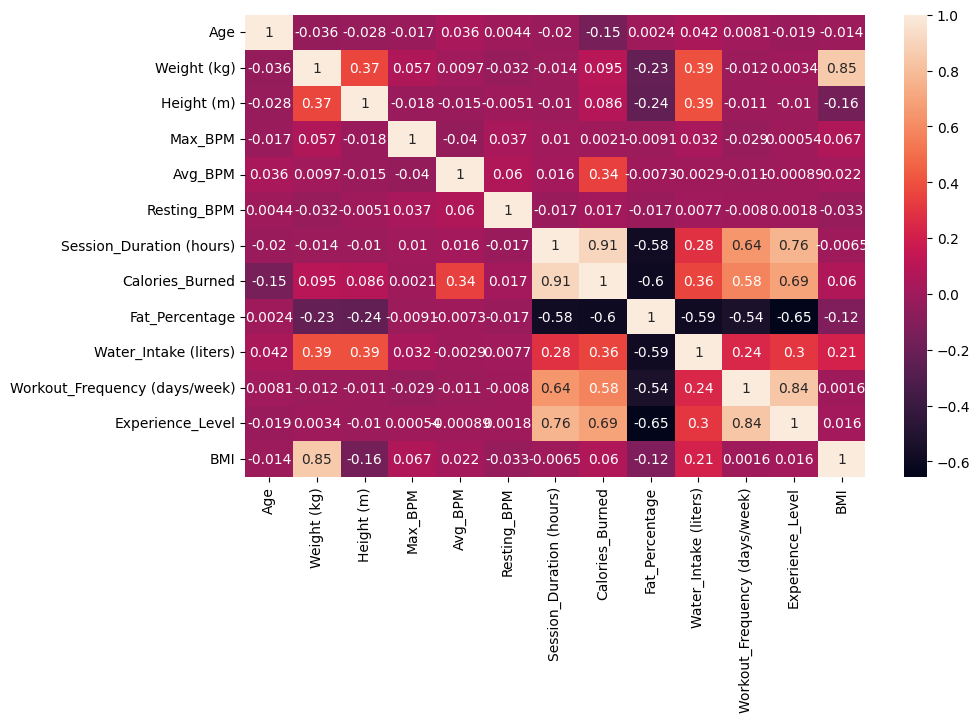

In [24]:
plt.figure(figsize=(10,6))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation,
           annot=True,
           cbar=True)

In [25]:
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

In [26]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [27]:
# separating the data and labels
X = data.drop(columns = ['Calories_Burned'], axis=1) # Feature matrix
y = data['Calories_Burned'] # Target variable

In [28]:
# list(label_encoder.classes_)
# y = label_encoder.inverse_transform(data['Gender'])
# y

In [29]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=45)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(973, 14) (681, 14) (292, 14)
(973,) (681,) (292,)


In [31]:
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

In [32]:
#LINEAR REGRESSION
linreg = LinearRegression().fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)

mae_scores.append(mae(y_test, y_pred1))
mse_scores.append(mse(y_test, y_pred1))
rmse_scores.append(mse(y_test, y_pred1, squared=False))
r2_scores.append(r2(y_test, y_pred1))

In [33]:
mae_scores,mse_scores,rmse_scores,r2_scores

([31.17703721577982],
 [1634.6153663443704],
 [40.43037677717548],
 [0.9784745899960647])

For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.
Conclusion

Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.

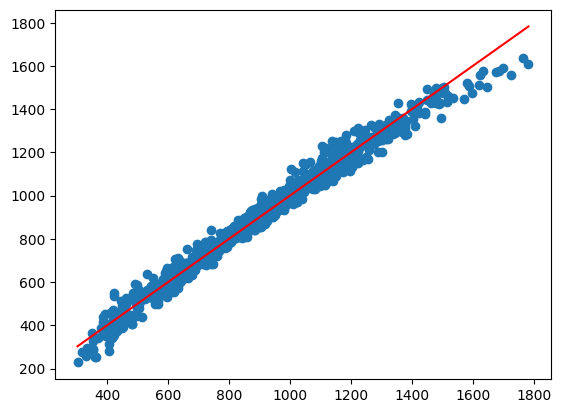

In [34]:

Ylin = np.linspace(data['Calories_Burned'].min(),data['Calories_Burned'].max(),100)
plt.scatter(data['Calories_Burned'],linreg.predict(X_scaled))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()

Feature 0: Age, Score: -41.98187362162838
Feature 1: Gender, Score: 41.69373181850764
Feature 2: Weight (kg), Score: -24.75912071379947
Feature 3: Height (m), Score: 14.0755455050083
Feature 4: Max_BPM, Score: 1.7296511455455437
Feature 5: Avg_BPM, Score: 87.86473812795407
Feature 6: Resting_BPM, Score: 3.637812998268654
Feature 7: Session_Duration (hours), Score: 243.17072820343927
Feature 8: Workout_Type, Score: -2.4075940679433625
Feature 9: Fat_Percentage, Score: -4.138188408245913
Feature 10: Water_Intake (liters), Score: -2.328169433750613
Feature 11: Workout_Frequency (days/week), Score: -0.2686356714412508
Feature 12: Experience_Level, Score: 1.0340713529964631
Feature 13: BMI, Score: 25.598672626295727


<Axes: >

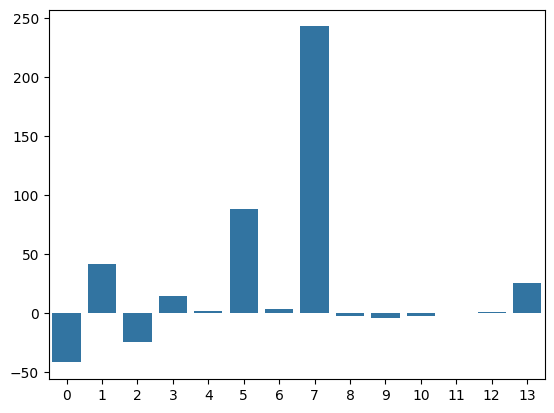

In [35]:
importance = linreg.coef_
importance

# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature {i}: {X.columns[i]}, Score: {v}')
# plot feature importance
sns.barplot(importance)


In [36]:
# for decission tree
# importances = linreg.feature_importances_
# feature_names = X_scaled.columns
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# print("Feature importances:")
# print(feature_importances)

In [37]:
#RIDGE REGRESSION
ridge = Ridge().fit(X_train, y_train)
y_pred2 = ridge.predict(X_test)

mae_scores.append(mae(y_test, y_pred2))
mse_scores.append(mse(y_test, y_pred2))
rmse_scores.append(mse(y_test, y_pred2, squared=False))
r2_scores.append(r2(y_test, y_pred2))



In [38]:
# list of alpha to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0,5.0]}
ridge = Ridge()
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0,
                                   5.0]},
             return_train_score=True, scoring='r2', verbose=1)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'neg_mean_absolute_error', 'neg_mean_squared_log_error', 'f1_macro', 'neg_mean_poisson_deviance', 'precision', 'jaccard_weighted', 'jaccard_samples', 'roc_auc_ovr', 'neg_root_mean_squared_log_error', 'jaccard_macro', 'recall_weighted', 'normalized_mutual_info_score', 'recall_samples', 'neg_median_absolute_error', 'd2_absolute_error_score', 'adjusted_mutual_info_score', 'precision_weighted', 'neg_negative_likelihood_ratio', 'jaccard', 'f1_micro', 'balanced_accuracy', 'homogeneity_score', 'neg_log_loss', 'mutual_info_score', 'neg_mean_gamma_deviance', 'completeness_score', 'neg_mean_squared_error', 'precision_micro', 'rand_score', 'roc_auc_ovr_weighted', 'v_measure_score', 'roc_auc_ovo', 'neg_root_mean_squared_error', 'f1_samples', 'f1', 'roc_auc_ovo_weighted', 'precision_macro', 'adjusted_rand_score', 'recall', 'recall_micro', 'explained_variance', 'positive_likelihood_ratio', 'precision_samples', 'roc_auc', 'recall_macro', 'neg_mean_absolute_percentage_error', 'accuracy', 'matthews_corrcoef', 'top_k_accuracy', 'f1_weighted', 'jaccard_micro', 'average_precision', 'r2', 'neg_brier_score', 'max_error', 'fowlkes_mallows_score'}

In [39]:
# Saving GridSearchCV results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
grid_cv_model.best_params_, grid_cv_model.best_score_

({'alpha': 0.7}, 0.9779015359576151)

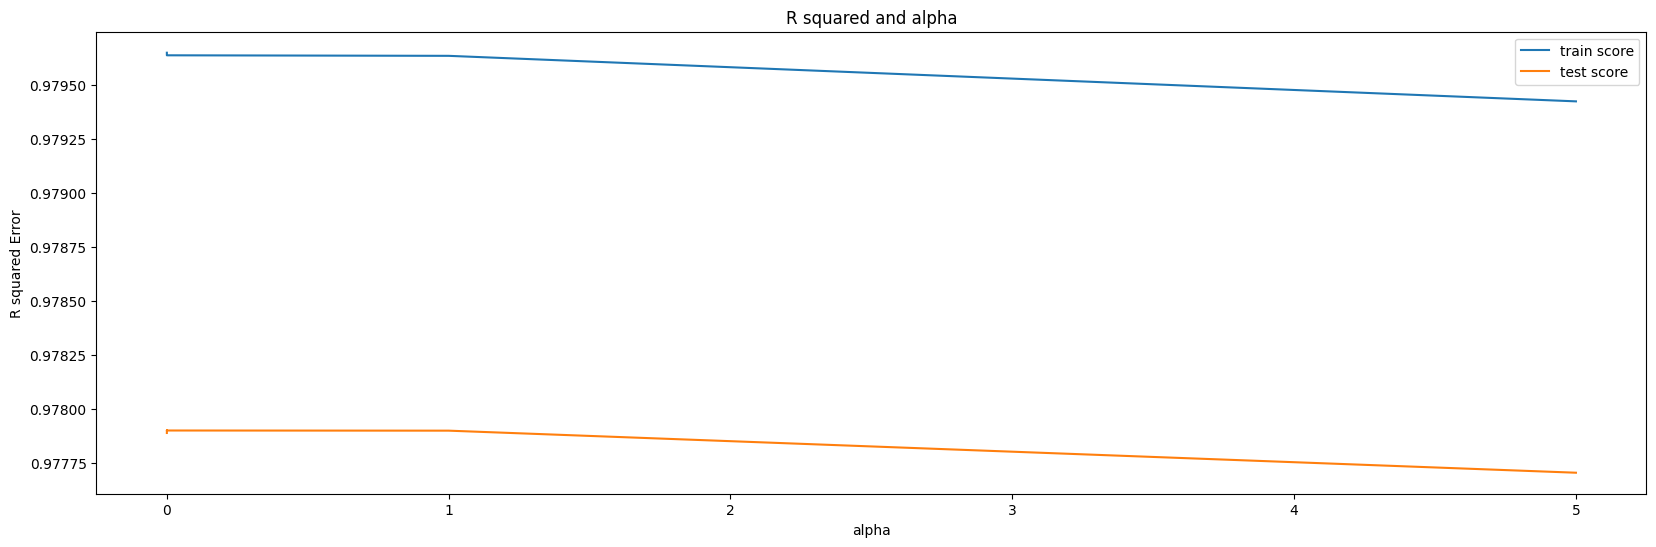

In [40]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,6))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('R squared and alpha')
plt.xlabel('alpha')
plt.ylabel('R squared Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [41]:
#Lasso REGRESSION
lasso = Lasso().fit(X_train, y_train)
y_pred3 = lasso.predict(X_test)

mae_scores.append(mae(y_test, y_pred3))
mse_scores.append(mse(y_test, y_pred3))
rmse_scores.append(mse(y_test, y_pred3, squared=False))
r2_scores.append(r2(y_test, y_pred3))


In [42]:

lasso = Lasso()
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0,
                                   5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
# Saving GridSearchCV results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
grid_cv_model.best_params_, grid_cv_model.best_score_

({'alpha': 1.0}, 0.9780348057480474)